<a href="https://colab.research.google.com/github/GuilhermeVeriss/practice/blob/main/python_learn/SeriesTemporais_Pedro%26Clelia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**

O presente notebook tem por objetivo registrar exercícios e reflexões a partir do livro

**"Métodos quantitativos: Séries Temporais", de Pedro A. Morettin e Clécia M. Toloi, 2° Edição**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#**Capítulo 1**

#*Problema 2, pg. 15*

In [8]:
pib_Brasil_dados = [27.614, 44.073, 63.746, 86.171, 122.430, 161.900, 208.300, 
              276.807, 363.167, 498.307, 719.519]

ano = np.arange(1964, 1975)
pib = np.array(pib_Brasil_dados)

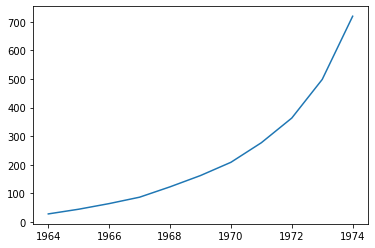

In [10]:
# (a)
# A série não é estacionária

plt.plot(ano, pib)

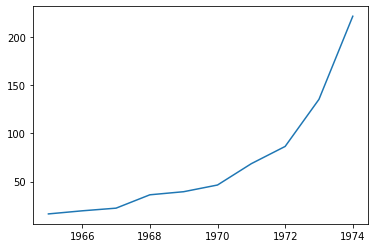

In [14]:
# (b)
# 1° diferença 

# note que a 1° diferença não é estacionária
diff_ano = ano[1:]
diff_pib = pib[1:] - pib[:-1]

plt.plot(diff_ano, diff_pib)

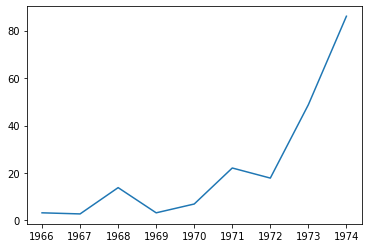

In [16]:
# (c)
# 2° diferença

"""
Note que a série começa a se mostrar estacionária conforme aumentamos a difença,
mas ainda não parece um método adequado para fazer a análise, pois o crescimento
aparenta ser exponencial
"""

diff2_pib = diff_pib[1:] - diff_pib[:-1]
diff2_ano = diff_ano[1:]

plt.plot(diff2_ano, diff2_pib)

#*Problema 4, pg. 16*

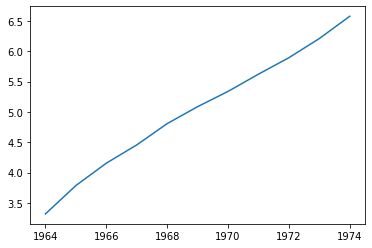

In [18]:
# O problema 4 realizaremos a partir da série anterior, pois o procedimento é o mesmo

# (c) logZ
# logaritmo da série pib

# Observamos que o logaritmo da série não é estacionário, mas apresenta tendência linear
# Uma tendência linear indica que a diferença dessa nova série pode ser estacionária

log_pib = np.log(pib)

plt.plot(ano, log_pib)

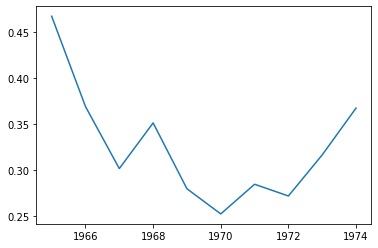

In [19]:
# (d)
# diferença da série do logaritmo

diff_log_pib = log_pib[1:] - log_pib[:-1]

plt.plot(diff_ano, diff_log_pib)

**Extra: cálculo de medidas móveis**

Na próxima parte, faremos uma análise a respeito de medidas móveis da série (como média móvel)



In [30]:
# Extra 
# Cálculo da média e desvio padrão móveis

def rol(func):
  # recebe func como parâmetro. Ex.: mean, std
  # retorna função que calcula uma medida móvel de uma série
  # Exemplo: média móvel

  def func_res(series, n):
    res = []
    for i in range(len(series)):
      if (i - n >= 0) & (i + n < len(series)):
        res.append(func(series[i-n:i+n]))
    return np.array(res)
  
  return func_res

rol_mean = rol(np.mean) # média móvel
rol_std = rol(np.std)  # std móvel

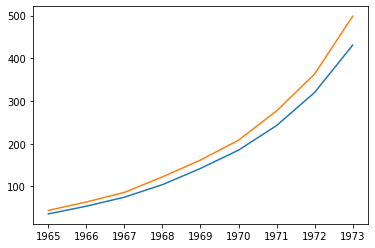

In [27]:
# média móvel do pib

pib_rolmean = rol_mean(pib, 1)

plt.plot(ano[1:-1], pib_rolmean)
plt.plot(ano[1:-1], pib[1:-1])

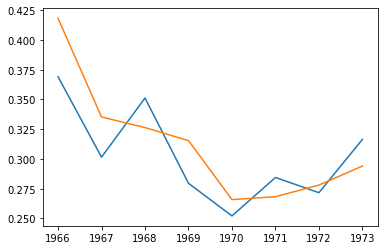

In [31]:
# média móvel da 1° diferença do log(pib)

pib_log_rolmean = rol_mean(diff_log_pib, 1)

plt.plot(diff_ano[1:-1], diff_log_pib[1:-1])
plt.plot(diff_ano[1:-1], pib_log_rolmean)